In [1]:
wd = "/exports/reum/dvanderbijl/"
data_dir = "/exports/reum/nsteinz/data/data_03_12_22/"
results_dir = "/exports/reum/nsteinz/results/"
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.neighbors import NearestNeighbors, KDTree, kneighbors_graph
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer
import sklearn.preprocessing as preprocessing
from sklearn.manifold import TSNE

from sknetwork.clustering import Louvain, get_modularity

from phenograph.cluster import cluster as cluster2

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import leidenalg
import igraph as ig

/exports/reum/nsteinz/lumc_torch/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/exports/reum/nsteinz/lumc_torch/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
features = [#'total Pijn',
            'TJC_28',
            #'TJC_44',
            #'total Zwelling',
            'SJC_28',
            #'SJC_44',
            #'Alkalische Fosfatase',
            
            #'Anti-CCP Kwant.',
            'BSE',
            #'C-Reaktief Proteïne',
            'Leukocyten',
            #'Hematocriet',
            'Hemoglobine',
            #'IgM reumafactor',
                #'Anti-CCP',
            #'MCH',
            #'MCHC',
            'MCV',
            'Trombocyten',
            #'Ferritine',
            #"Sex",
           ]
dmards = ['ABATACEPT',
       'ADALIMUMAB', 'AZATHIOPRINE', 'BARICITINIB', 'CERTOLIZUMAB_PEGOL',
       'CYCLOPHOSPHAMIDE', 'ETANERCEPT', 'GOLIMUMAB', 'HYDROXYCHLOROQUINE',
       'INFLIXIMAB', 'LEFLUNOMIDE', 'METHOTREXATE', 'METHYLPREDNISOLONE',
       'PREDNISOLONE', 'RITUXIMAB', 'SODIUM_AUROTHIOMALATE', 'SULFASALAZINE',
       'TOCILIZUMAB', 'TOFACITINIB']

In [3]:
data_use = pd.read_csv("similarity_trajectories.csv", header = None)


#X_embedded = TSNE(n_components=2, learning_rate='auto',
#                  init='random', perplexity=100).fit_transform(data_use[list(features)].fillna(0).values)


In [4]:
data_used = data_use

In [5]:
from phenograph.cluster import cluster as cluster2
import pandas as pd
from scipy import sparse
import numpy as np
import phenograph

from sklearn.metrics import silhouette_score


def cluster_entropy(array:np.ndarray) -> float:
    total = len(array)
    entropy = 0
    for nr in np.unique(array, return_counts=True)[1]:
        entropy +=(nr/total*np.log(nr/total))
    return -entropy/len(set(array))

def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

# Calculating distance
# define a function that will give us the relevant output for the input k
def calc_cluster_characteristics(
        embedding:pd.DataFrame,
        k:int= 10,
        seed:int = 20221003,
        metric="cosine"
    ) -> pd.DataFrame:
    """
    caluculates the clusters and some values to determine the optimal K.
    
    metrics that can be used:
    [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’‘braycurtis’, 
    ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’,
    ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’,
    ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’] 
    """
    
    results = pd.Series(dtype = 'float64')
    results['k'] = k 
    #ng = kneighbors_graph(data_used, n_neighbors= k, mode="distance" , include_self=True, metric=metric)
    #louv_alg = Louvain(random_state=int(seed+k)) # metric='minkowski', seed=seed) # random_state=seed,
    #lv = louv_alg.fit(ng)
    #sources, targets = ng.nonzero()
    #edgelist = zip(sources.tolist(), targets.tolist())
    #g = ig.Graph(edgelist)
    #partition = leidenalg.find_partition(g, leidenalg.CPMVertexPartition, )
    communities, graph, modularity = cluster2(embedding, k=k, seed= 20221003, primary_metric=metric, clustering_algo="leiden")
    results['communities'], results['modularity'] = communities, modularity
    results['components'] = graph
    results["gini"] = gini_coefficient(results['communities'])
    results["silhouette"] =  silhouette_score(data_used,results['communities'], metric=metric)
    results['entropy'] = cluster_entropy(results['communities'])
    return results






 



In [6]:
ks = np.arange(100, 1201, 50) #5 # This is the range of k values we will look at
cluster_chars_list = [calc_cluster_characteristics(k=k,embedding=data_used) for k in ks]
cluster_characteristics = pd.concat(cluster_chars_list, axis = 1).transpose()







Finding 100 nearest neighbors using cosine metric and 'brute' algorithm
Neighbors computed in 0.546628475189209 seconds
Jaccard graph constructed in 2.7419493198394775 seconds
Running Leiden optimization
Leiden completed in 0.0761117935180664 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.390397548675537 seconds
Finding 150 nearest neighbors using cosine metric and 'brute' algorithm
Neighbors computed in 0.3532233238220215 seconds
Jaccard graph constructed in 4.2970051765441895 seconds
Running Leiden optimization
Leiden completed in 0.10783672332763672 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 5.837945222854614 seconds
Finding 200 nearest neighbors using cosine metric and 'brute' algorithm
Neighbors computed in 0.3788416385650635 seconds
Jaccard graph constructed in 5.8083696365356445 seconds
Running Leiden optimization
Leiden completed in 0.14097213745117188 seconds
Sorting communities by size, please wait ...
PhenoGra

## Plot heatmap 

/tmp/ipykernel_903110/2856286205.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


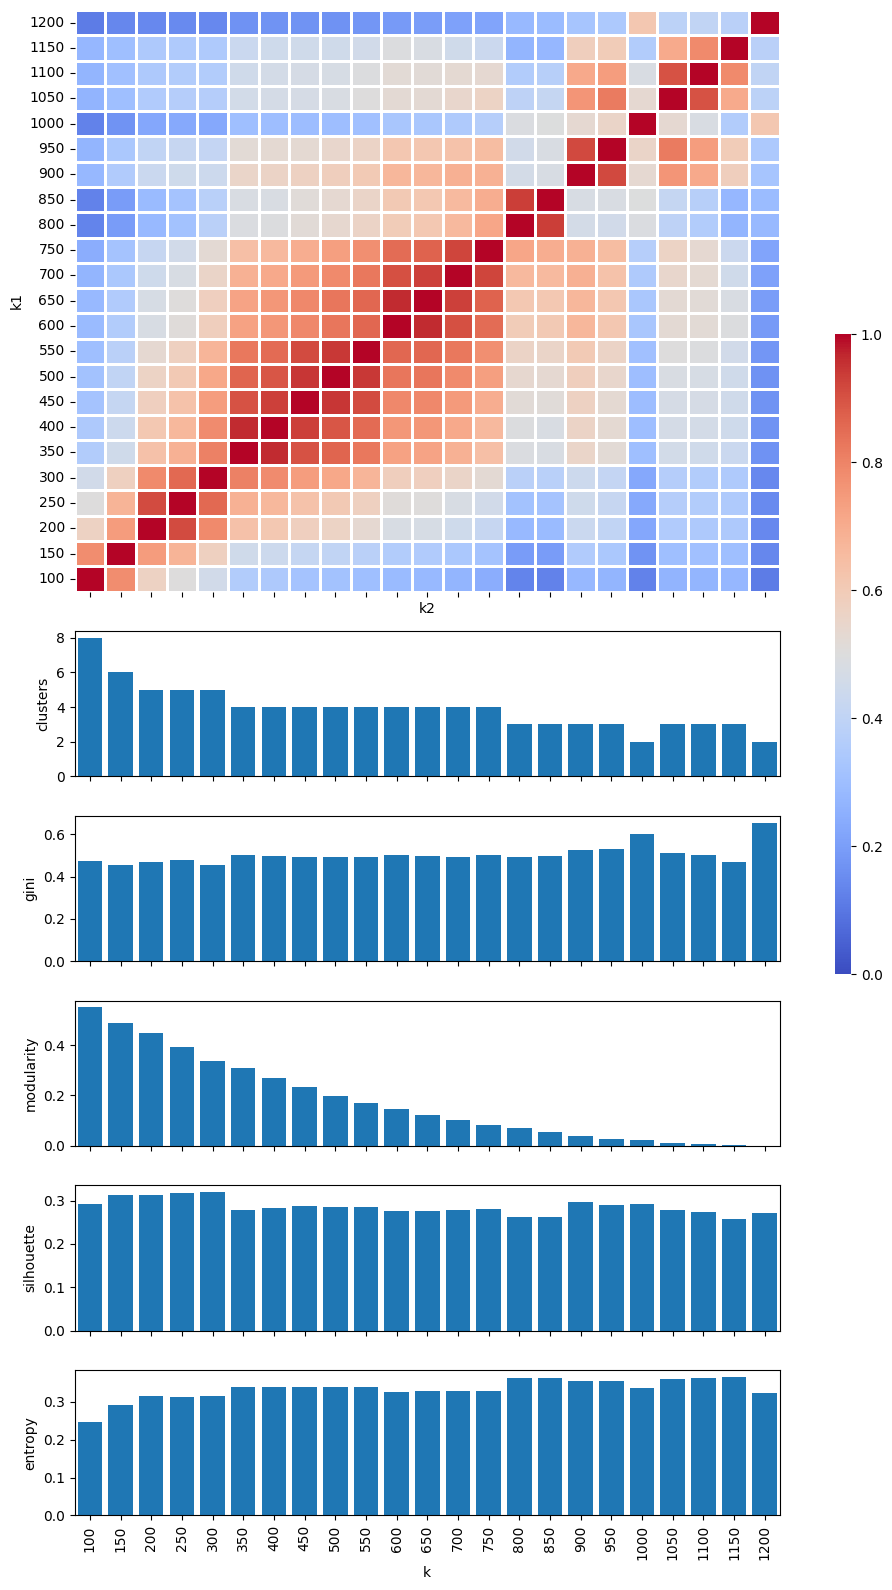

In [7]:
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plotting(characteristics):

    n = len(characteristics)
    Rand_indices = pd.DataFrame(np.zeros((n,n)), index = ks, columns = ks)

    Rand_indices.index.name = 'k1'
    Rand_indices.columns.name = 'k2'

    for i in range(n):
        for j in range(n):
            Rand_indices.iloc[i, j] = adjusted_rand_score(
                cluster_characteristics['communities'][i], 
                cluster_characteristics['communities'][j]
            )
        
    cluster_characteristics['clusters'] = cluster_characteristics['communities'].apply(lambda x: len(np.unique(x)))
    
    
    fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(8, 16), sharex='col',
                            gridspec_kw={'height_ratios': [16, 4, 4, 4, 4,4]}
                            )
    cbar_ax = fig.add_axes([1.05, .388, .02, .4]) # square=True, 
    sns.heatmap(Rand_indices,
                cmap=('coolwarm'),
                vmin=0,
                vmax=1,
                cbar_ax=cbar_ax,
                xticklabels=False,
                linewidths=1,
                ax=axs[0], 
                #title="adjusted rand index"
               ).invert_yaxis()

    x_ticks = list(Rand_indices.columns)
    x_tick_pos = [i + 0.5 for i in range(len(x_ticks))]

    barplots = ["clusters", "gini", "modularity", "silhouette", "entropy"]
    for ax, name in zip(axs[1:], barplots):
        ax.set_ylabel(name)
        ax.bar(x_tick_pos, characteristics[name], align='center')

    axs[-1].set_xticks(x_tick_pos)
    axs[-1].set_xticklabels(x_ticks, rotation=90)
    axs[-1].set_xlabel('k')
    return fig, axs



plotting(cluster_characteristics)
plt.tight_layout()
plt.show()


In [8]:
cluster_characteristics["silhouette"]*(1/cluster_characteristics['clusters'])*cluster_characteristics["gini"]

0     0.017317
1      0.02381
2     0.029353
3     0.030243
4     0.029096
5     0.034959
6     0.035103
7     0.035304
8     0.034983
9     0.034908
10    0.034548
11    0.034353
12    0.034251
13    0.035306
14    0.043025
15    0.043372
16    0.052076
17    0.051195
18    0.087293
19    0.047395
20    0.045815
21    0.040448
22    0.089133
dtype: object

In [9]:
ks = np.arange(10, 301, 10) #5 # This is the range of k values we will look at
cluster_chars_list = [calc_cluster_characteristics(k=k,embedding=data_used, metric="minkowski") for k in ks]
cluster_characteristics = pd.concat(cluster_chars_list, axis = 1).transpose()

Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.32094526290893555 seconds
Jaccard graph constructed in 1.5699365139007568 seconds
Running Leiden optimization
Leiden completed in 0.020262479782104492 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 3.303959608078003 seconds
Finding 20 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.09916305541992188 seconds
Jaccard graph constructed in 1.5855093002319336 seconds
Running Leiden optimization
Leiden completed in 0.0341341495513916 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 3.0881972312927246 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.10278964042663574 seconds
Jaccard graph constructed in 1.6773157119750977 seconds
Running Leiden optimization
Leiden completed in 0.035275936126708984 seconds
Sorting communities by size, please wait ..

/tmp/ipykernel_903110/2907142933.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


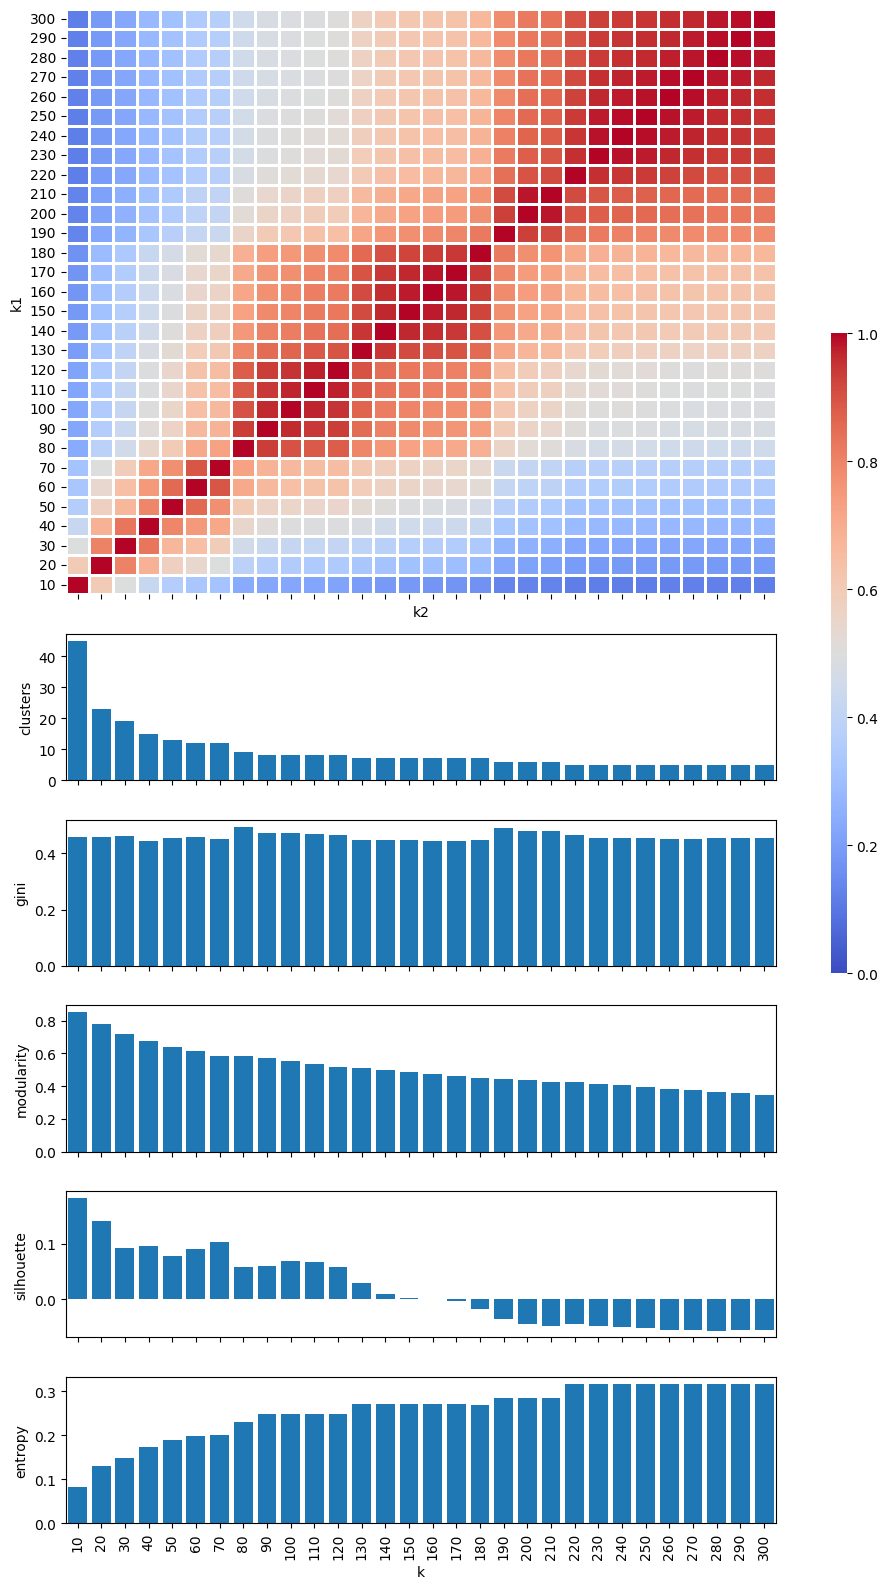

In [10]:
plotting(cluster_characteristics)
plt.tight_layout()
plt.show()

In [11]:
ks = np.arange(10, 301, 10) #5 # This is the range of k values we will look at
cluster_chars_list = [calc_cluster_characteristics(k=k,embedding=data_used, metric="euclidean") for k in ks]
cluster_characteristics = pd.concat(cluster_chars_list, axis = 1).transpose()

Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.09855937957763672 seconds
Jaccard graph constructed in 1.4014060497283936 seconds
Running Leiden optimization
Leiden completed in 0.021381855010986328 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 2.8196237087249756 seconds
Finding 20 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.09406685829162598 seconds
Jaccard graph constructed in 1.4696710109710693 seconds
Running Leiden optimization
Leiden completed in 0.03414106369018555 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 2.886765241622925 seconds
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.09628009796142578 seconds
Jaccard graph constructed in 1.530240774154663 seconds
Running Leiden optimization
Leiden completed in 0.03616523742675781 seconds
Sorting communities by size, please wait ...

/tmp/ipykernel_903110/2907142933.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


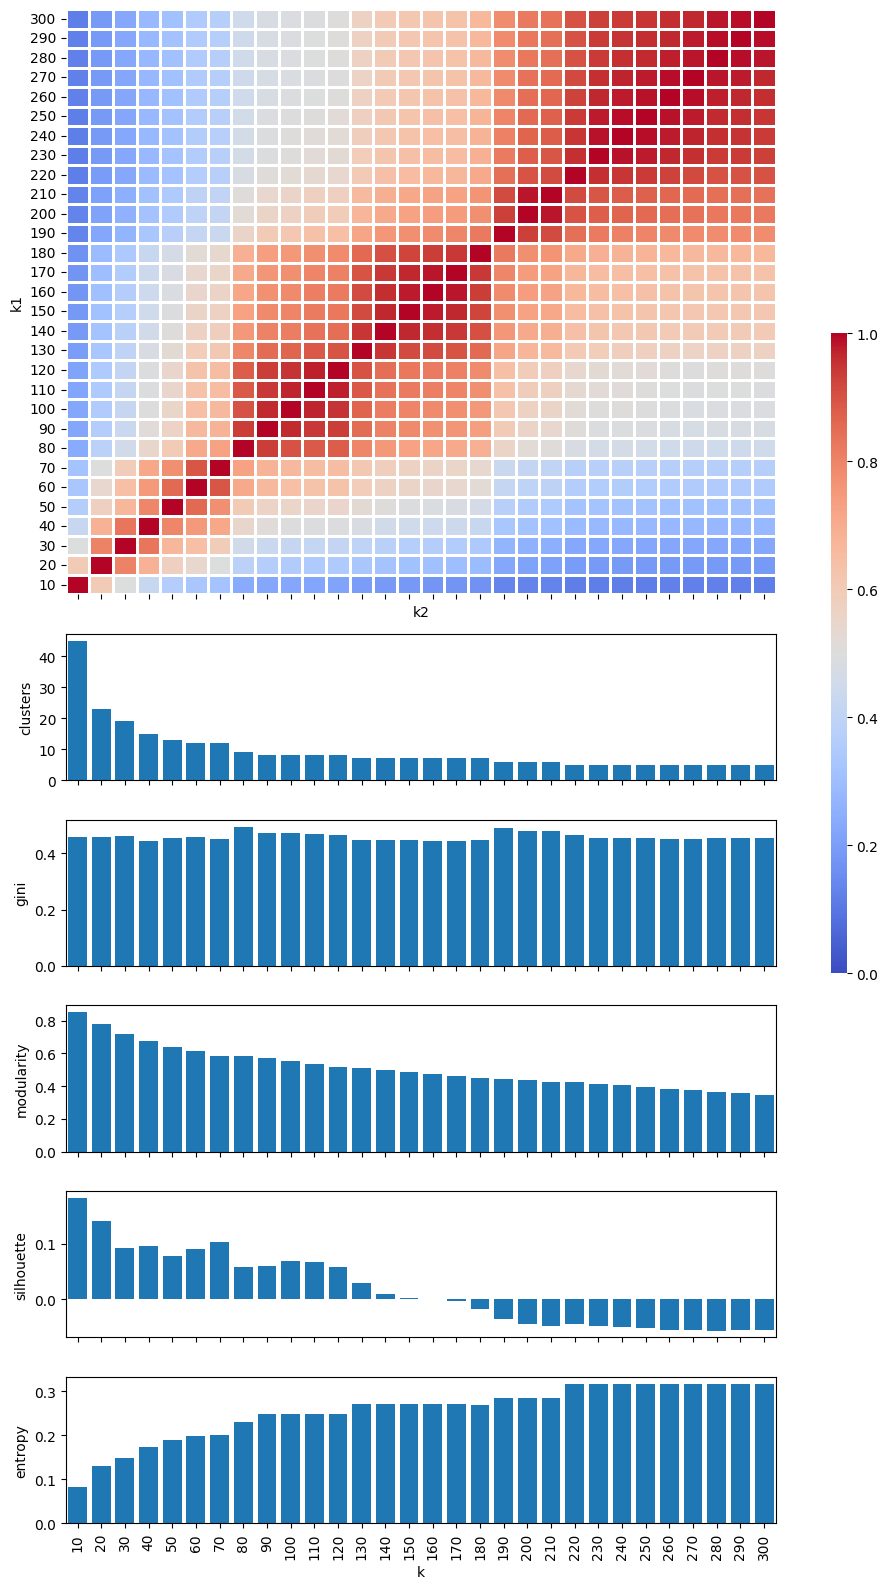

In [12]:
plotting(cluster_characteristics)
plt.tight_layout()
plt.show()

In [13]:
ks = np.arange(10, 301, 10) #5 # This is the range of k values we will look at
cluster_chars_list = [calc_cluster_characteristics(k=k,embedding=data_used, metric="canberra") for k in ks]
cluster_characteristics = pd.concat(cluster_chars_list, axis = 1).transpose()

Finding 10 nearest neighbors using canberra metric and 'auto' algorithm
Neighbors computed in 1.5973262786865234 seconds
Jaccard graph constructed in 1.4257071018218994 seconds
Running Leiden optimization
Leiden completed in 0.02333831787109375 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.370128870010376 seconds
Finding 20 nearest neighbors using canberra metric and 'auto' algorithm
Neighbors computed in 1.5613179206848145 seconds
Jaccard graph constructed in 1.5425336360931396 seconds
Running Leiden optimization
Leiden completed in 0.02807331085205078 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.459317207336426 seconds
Finding 30 nearest neighbors using canberra metric and 'auto' algorithm
Neighbors computed in 1.5653276443481445 seconds
Jaccard graph constructed in 1.5490047931671143 seconds
Running Leiden optimization
Leiden completed in 0.03486180305480957 seconds
Sorting communities by size, please wait ...
PhenoG

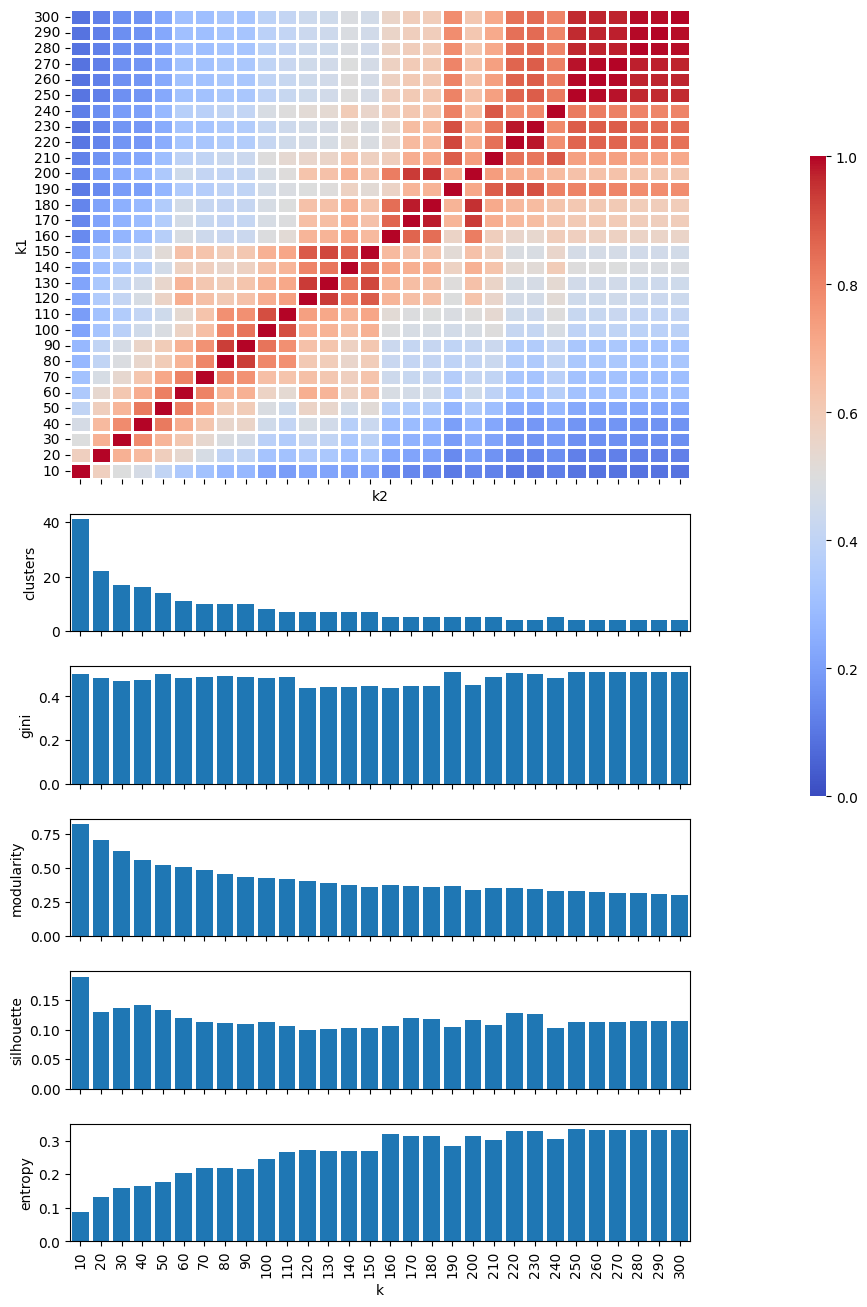

In [14]:
plotting(cluster_characteristics)

plt.show()